In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

from epf.util import load_and_concat_data, predict_with_timestamps
from epf.config import PROCESSED_DATA_DIR, FeatureConfig

2025-05-16 10:57:10.937 | INFO     | epf.config:<module>:19 - PROJ_ROOT path is: C:\Users\valen\PycharmProjects\epf
2025-05-16 10:57:10.937 | INFO     | epf.config:create_dir:15 - DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - RAW_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/raw
2025-05-16 10:57:10.938 | INFO     | epf.config:create_dir:15 - INTERIM_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/interim
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - PROCESSED_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed
2025-05-16 10:57:10.939 | INFO     | epf.config:create_dir:15 - TRAIN_DATA_DIR path is: C:/Users/valen/PycharmProjects/epf/data/processed/train_data
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - MODELS_DIR path is: C:/Users/valen/PycharmProjects/epf/models
2025-05-16 10:57:10.940 | INFO     | epf.config:create_dir:15 - PREDICTIONS_D

In [30]:
file_paths = {'de_prices': ['de_prices_2020.csv', 'de_prices_2021.csv', 'de_prices_2022.csv', 'de_prices_2023.csv', 'de_prices_2024.csv']}

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

# avg Weekly volatility de lu prices

In [ ]:
tmp = []

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])
    tmp.append(data)

df = pd.concat(tmp, axis=1)

In [ ]:
df['volatility'] = df['de_prices'].rolling(window=24).std()
df['year'] = df.index.year
df['day'] = [x.strftime('%j') for x in df.index]
df['week'] = [x.strftime('%W') for x in df.index]

In [ ]:
df['mean_price'] = df['de_prices'].rolling(window=24*7).mean()
df['std_dev'] = df['de_prices'].rolling(window=24*7).std()

df['upper_band'] = df['mean_price'] + df['std_dev']
df['lower_band'] = df['mean_price'] - df['std_dev']

sns.set_style('ticks')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['mean_price'], color=COLORS['magenta'], label='Mean Price')
plt.fill_between(df.index, df['lower_band'], df['upper_band'], color=COLORS['purple'], alpha=0.3, label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Price in €/MWh')
plt.legend(loc='upper left')

#plt.title('Average weekly volatility of Prices in DE_LU bidding zone')

#plt.savefig("../reports/figures/volatility.pdf", dpi=300, bbox_inches='tight')

# Normed features

In [3]:
path = PROCESSED_DATA_DIR / "features.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)

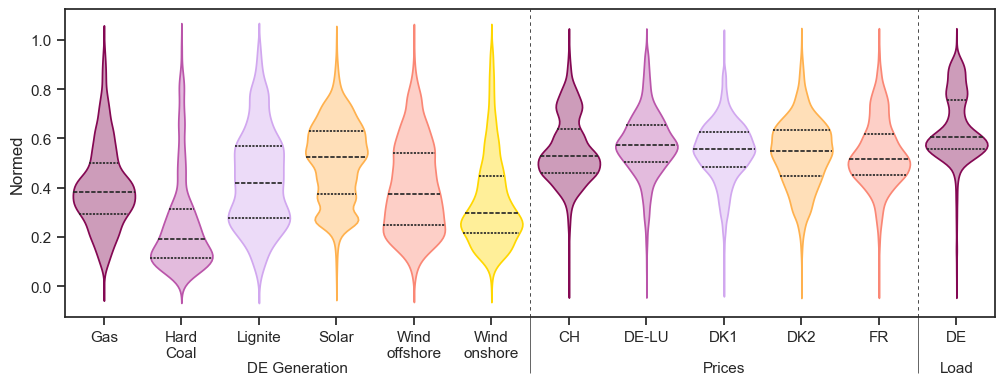

In [204]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

with open("../models/lstm_all_features.pkl", "rb") as f:
    model_obj = pkl.load(f)

train_df = model_obj['train_df']
fs = pd.read_csv("../data/processed/features.csv", index_col=0, parse_dates=True)

feature_set = fs[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'de_load_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal']]
train_df = train_df[['de_gas_gen_rm_seasonal', 'de_hard_coal_gen_rm_seasonal', 'de_lignite_gen_rm_seasonal', 'de_solar_gen_rm_seasonal', 'de_wind_gen_offshore_rm_seasonal', 'de_wind_gen_onshore_rm_seasonal', 'ch_prices_hat_rm_seasonal', 'de_prices_hat_rm_seasonal', 'dk1_prices_hat_rm_seasonal', 'dk2_prices_hat_rm_seasonal', 'fr_prices_hat_rm_seasonal', 'de_load_rm_seasonal']]

palette = {
    # first palette
    'de_gas_gen_rm_seasonal': COLORS['magenta'],
    'de_hard_coal_gen_rm_seasonal': COLORS['purple'],
    'de_lignite_gen_rm_seasonal': COLORS['light_purple'],
    'de_solar_gen_rm_seasonal': COLORS['orange'],
    'de_wind_gen_offshore_rm_seasonal': COLORS['light_orange'],
    'de_wind_gen_onshore_rm_seasonal': COLORS['gold'],

    # second palette
    'ch_prices_hat_rm_seasonal': COLORS['magenta'],
    'de_prices_hat_rm_seasonal': COLORS['purple'],
    'dk1_prices_hat_rm_seasonal': COLORS['light_purple'],
    'dk2_prices_hat_rm_seasonal': COLORS['orange'],
    'fr_prices_hat_rm_seasonal': COLORS['light_orange'],

    # third palette
    'de_load_rm_seasonal': COLORS['magenta'],
}

labels = {
    #first labels
    'de_solar_gen_rm_seasonal': 'Solar',
    'de_wind_gen_onshore_rm_seasonal': 'Wind\nonshore',
    'de_wind_gen_offshore_rm_seasonal': 'Wind\noffshore',
    'de_hard_coal_gen_rm_seasonal': 'Hard\nCoal',
    'de_lignite_gen_rm_seasonal': 'Lignite',
    'de_gas_gen_rm_seasonal': 'Gas',

    # second labels
    'de_prices_hat_rm_seasonal': 'DE-LU',
    'ch_prices_hat_rm_seasonal': 'CH',
    'dk1_prices_hat_rm_seasonal': 'DK1',
    'dk2_prices_hat_rm_seasonal': 'DK2',
    'fr_prices_hat_rm_seasonal': 'FR',

    # third labels
    'de_load_rm_seasonal': 'DE',
}

train_min = train_df.min()
train_max = train_df.max()

keys = feature_set.keys()

sns.set_style("ticks")

df_std = (feature_set - train_min) / (train_max - train_min)
plt.figure(figsize=(12, 4))

ax = sns.violinplot(data=train_df, inner="quart", palette=palette, saturation=1)
for violin, color in zip(ax.collections[::1], palette.values()):
    facecolor = plt.matplotlib.colors.to_rgba(color, alpha=0.4)
    violin.set_facecolor(facecolor)
    violin.set_edgecolor(color)
#ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels([labels[col] for col in train_df.columns])
ax.set_ylabel('Normed')
ax.axvline(x = 5.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)
ax.axvline(x = 10.5, color='black', linestyle=(0, (5, 5)), linewidth=0.5)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks(ticks=[2.5, 8, 11], labels=['\nDE Generation', '\nPrices', '\nLoad'])
sec.tick_params('x', length=0, pad=20)
sec.spines["bottom"].set_visible(False)

sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(ticks=[5.5, 10.5], labels=[])
sec2.tick_params('x', length=40, width=0.5)
sec2.spines["bottom"].set_visible(False)

plt.savefig("../reports/figures/normed_feature_distribution.svg", dpi=300, bbox_inches='tight')

plt.show()

# Metrics

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'shifted_gru_vre_lags'),
  Text(1, 0, 'shifted_gru_vre_lags_sl'),
  Text(2, 0, 'shifted_lstm_vre_sl'),
  Text(3, 0, 'shifted_lstm_vre_lags_sl'),
  Text(4, 0, 'shifted_lstm_vre'),
  Text(5, 0, 'shifted_lstm_vre_fossil'),
  Text(6, 0, 'shifted_lstm_vre_lags'),
  Text(7, 0, 'shifted_gru_vre_sl'),
  Text(8, 0, 'shifted_gru_vre'),
  Text(9, 0, 'shifted_lstm_vre_fossil_sl'),
  Text(10, 0, 'shifted_gru_vre_fossil_sl'),
  Text(11, 0, 'shifted_gru_vre_fossil'),
  Text(12, 0, 'shifted_gru_vre_all_features_sl'),
  Text(13, 0, 'shifted_lstm_vre_all_features'),
  Text(14, 0, 'shifted_gru_vre_all_features'),
  Text(15, 0, 'shifted_lstm_vre_neighboring_prices'),
  Text(16, 0, 'shifted_lstm_vre_all_features_sl'),
  Text(17, 0, 'shifted_gru_vre_neighboring_prices_sl'),
  Text(18, 0, 'shifted_lstm_vre_neighboring_prices_sl'),
  Text(19, 0, 'shifted_gru_vre_neighboring_prices')])

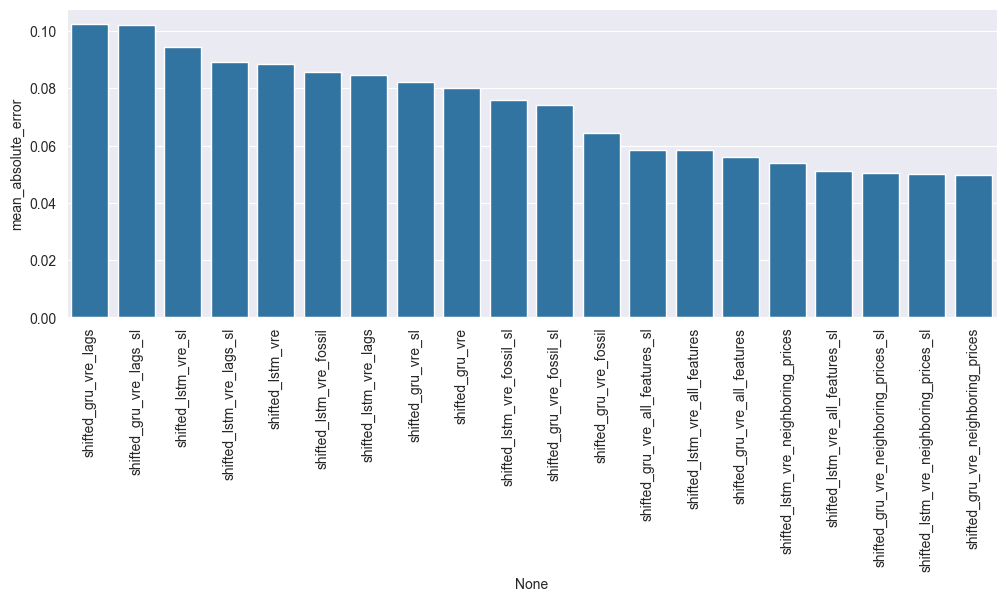

In [8]:
import pickle as pkl
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

with open("../data/processed/performance.pkl", "rb") as f:
    performance = pkl.load(f)

drop_cols = [col for col in performance.keys() if not col.startswith('shifted')]
p = pd.DataFrame(performance).drop(columns=drop_cols).T.sort_values('mean_absolute_error', ascending=False)

plt.figure(figsize=(12, 4))

sns.barplot(data=p, x=p.index, y='mean_absolute_error')
plt.xticks(rotation=90)

In [9]:
p.round(4)

,loss,mean_absolute_error,root_mean_squared_error
shifted_gru_vre_lags,0.1025,0.1025,0.1412
shifted_gru_vre_lags_sl,0.1020,0.1020,0.1367
shifted_lstm_vre_sl,0.0946,0.0946,0.1314
shifted_lstm_vre_lags_sl,0.0893,0.0893,0.1271
shifted_lstm_vre,0.0883,0.0883,0.1274
shifted_lstm_vre_fossil,0.0855,0.0855,0.1223
shifted_lstm_vre_lags,0.0847,0.0847,0.1236
shifted_gru_vre_sl,0.0822,0.0822,0.1142
shifted_gru_vre,0.0800,0.0800,0.1155
shifted_lstm_vre_fossil_sl,0.0760,0.0760,0.1095


# naive forecast

In [20]:
import pandas as pd

df_price = pd.read_csv('../data/raw/de_prices_2024.csv', parse_dates=True, skiprows=2, index_col=0, names=['de_prices'], dtype={'de_prices': float})
df_price.index = df_price.index.tz_localize(None)

true = df_price['de_prices']
naive = true.shift(24*7)  # shift by one week to get the naive forecast

naive_mae = (true - naive).abs().mean()
naive_rmse = ((true - naive) ** 2).mean() ** 0.5

In [21]:
print(f'Naive MAE: {naive_mae.round(2)}')
print(f'Naive RMSE: {naive_rmse.round(2)}')

Naive MAE: 34.66
Naive RMSE: 75.54


# Error analysis

retrieve the predictions, group them by day/week/month to see error at different points in time

## data prep

In [53]:
import pandas as pd
import pickle as pkl
from epf.util import predict_with_timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

with open("../models/shifted_lstm_vre_sl.pkl", "rb") as f:
    lstm_model_obj = pkl.load(f)

with open("../models/shifted_gru_vre_sl.pkl", "rb") as f:
    gru_model_obj = pkl.load(f)

lstm_preds = predict_with_timestamps(lstm_model_obj)
gru_preds = predict_with_timestamps(gru_model_obj)

In [54]:
# --------------------------------------------- #
# retrieve true prices
df_price = pd.read_csv('../data/raw/de_prices_2024.csv', parse_dates=True, skiprows=2, index_col=0, names=['de_prices'], dtype={'de_prices': float})
df_price.index = df_price.index.tz_localize(None)

horizons = range(1, 25)
col_names = [f't+{h}' for h in horizons]

trues = pd.DataFrame(index=df_price.index)

# fill the trues with the prices of the same hour from the previous week, each forecast is a row in the dataframe
for h in horizons:
    trues[f'true_t+{h}'] = df_price.shift(-h)

# ---------------------------------------------- #
# only retain the relevant indices
start = lstm_preds.index[0]
end = lstm_preds.index[-1]

trues = trues.loc[start:end]

In [55]:
# unify colnames of the dataframes
lstm_preds.columns = [f'lstm_preds_{col.split("_")[-1]}' for col in lstm_preds.columns]
gru_preds.columns = [f'gru_preds_{col.split("_")[-1]}' for col in gru_preds.columns]

In [56]:
# unify dataframe and rename columns
lstm_errors = pd.DataFrame(np.abs(trues.iloc[:, :].values - lstm_preds.iloc[:, :].values),
                           columns=[f'lstm_error_{col.split("_")[-1]}' for col in lstm_preds.columns])
gru_errors = pd.DataFrame(np.abs(trues.iloc[:, :].values - gru_preds.iloc[:, :].values),
                          columns=[f'gru_error_{col.split("_")[-1]}' for col in gru_preds.columns])

df = pd.concat([lstm_errors, gru_errors], axis=1)
df.index = lstm_preds.index
df.dropna(inplace=True)

In [57]:
import holidays

# supplementary data
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_string'] = [x.strftime('%a') for x in df.index]
df['month'] = df.index.month
df['month_string'] = [x.strftime('%b') for x in df.index]
df['year'] = df.index.year
df['week'] = [x.strftime('%W') for x in df.index]
df['season'] = [
    'Winter' if x.month in [12, 1, 2] else
    'Spring' if x.month in [3, 4, 5] else
    'Summer' if x.month in [6, 7, 8] else
    'Autumn' for x in df.index
]
de_holidays = holidays.country_holidays('DE', years=[2023,2024])
# set holiday to 1 if it is a holiday else 0
df['holiday'] = df.index.to_series().apply(lambda x: "Holiday" if x in de_holidays else "No holiday")

## Error by season and hour

first version not used because too little granularity in the plot

In [ ]:
# melt wide format to long format
melted = df.melt(
    id_vars=['season', 'hour'],
    value_vars=['lstm_error_mean', 'gru_error_mean'],
    var_name='model',
    value_name='error'
)
melted['model'] = melted['model'].str.replace('_error_mean', '')
melted['model'] = melted['model'].str.replace('lstm', 'LSTM (VRE only)').str.replace('gru', 'GRU (VRE only)')

# filter original df
target_hours = [6, 12, 18]
melted = melted[melted['hour'].isin(target_hours)]

season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
melted['season'] = pd.Categorical(melted['season'], categories=season_order, ordered=True)
melted = melted.sort_values(['season', 'model', 'hour'])

# aggregate by season, model, and hour
agg_df = (
    melted
    .groupby(['season', 'model', 'hour'], as_index=False)
    .agg({'error': 'mean'})
)

# ordering help
model_order = ['LSTM (VRE only)', 'GRU (VRE only)']
hour_order = [6, 12, 18]
bar_order = [(model, hour) for model in model_order for hour in hour_order]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(12, 8))

seasons = season_order
x = np.array([0, 0.8, 1.6, 2.4])
bar_width = 0.07
group_gap = 0.02
model_group_width = 3 * bar_width
group_width = 3 * model_group_width + 2 * group_gap

# Color mapping
color_keys = {
    ('LSTM (VRE only)', 6): 'magenta',
    ('LSTM (VRE only)', 12): 'purple',
    ('LSTM (VRE only)', 18): 'light_purple',
    ('GRU (VRE only)', 6): 'blue',
    ('GRU (VRE only)', 12): 'blue_grey',
    ('GRU (VRE only)', 18): 'light_blue',
}

# Plot each bar
for i, season in enumerate(seasons):
    for mi, model in enumerate(model_order):
        for hi, hour in enumerate(hour_order):
            j = mi * 3 + hi
            # new x: start of season group + model group offset + hour offset
            bar_x = (
                x[i]
                - group_width / 2
                + mi * (model_group_width + group_gap)
                + (hi + 0.5) * bar_width
            )
            val = agg_df[
                (agg_df['season'] == season) &
                (agg_df['model'] == model) &
                (agg_df['hour'] == hour)
            ]['error'].values[0]
            color = COLORS[color_keys[(model, hour)]]
            ax.bar(
                bar_x, val,
                width=bar_width,
                color=color,
                edgecolor=color,
                alpha=0.4,
                linewidth=1,
                label=f"{model} {hour}h" if i == 0 else None
            )
            # hour label above bar
            if i == 0:  # only label the first season and the first model
                ax.text(
                    bar_x, val + 0.002,
                    f"{hour}h",
                    ha='center', va='bottom',
                    fontsize=10
                )

# labels for model groups
ymin, ymax = ax.get_ylim()
label_y = ymin - 0.05 * (ymax - ymin)
for i, season in enumerate(seasons):
    for mi, model in enumerate(model_order):
        # center of model group
        start = (
            x[i]
            - group_width / 2
            + mi * (model_group_width + group_gap)
            + 1.5 * bar_width
        )
        text = model.replace('(', '\n(') if '(' in model else model
        ax.text(
            start, label_y * 0.4,
            text,
            ha='center',
            va='top',
            fontsize=10
        )

ax.set_xticks(x)
ax.set_xticklabels(seasons)
ax.set_ylabel("MAE (€/MWh)")
ax.set_xlabel("Season")
ax.set_ylim(bottom=label_y * 1.8)
plt.tight_layout()

#plt.savefig("../reports/figures/mae_by_season_and_hour.pdf", dpi=300, bbox_inches='tight')
plt.show()

data prep for the next two plots

In [58]:
def get_hour_errors(df, block_prefix, target_hour):
    cols = [f"{block_prefix}_t+{i}" for i in range(1, 25)]
    mat = df[cols].values
    origin = df.index.hour
    horizons = ((target_hour - origin - 1) % 24) + 1
    errs = mat[np.arange(len(df)), horizons - 1]
    target_timestamps = df.index + pd.to_timedelta(horizons, unit="h")

    return pd.DataFrame({
        'error': errs,
        "target_timestamp": target_timestamps
    }, index=df.index)

In [59]:
cols = ['lstm_error', 'gru_error']

records = []

for model in cols:
    for h in range(24):
        tmp = get_hour_errors(df, model, h)
        tmp["Model"] = model.split('_')[0].replace('lstm', 'LSTM (VRE only)').replace('gru', 'GRU (VRE only)')
        records.append(tmp)

hourly_errors = pd.concat(records)

hourly_errors['Season'] = hourly_errors['target_timestamp'].dt.month.map(
    lambda m: 'Winter' if m in [12,1,2] else
              'Spring' if m in [3,4,5] else
              'Summer' if m in [6,7,8] else
              'Autumn'
)
hourly_errors.rename(columns={'target_timestamp':'hour'}, inplace=True)
hourly_errors['hour'] = hourly_errors['hour'].dt.hour

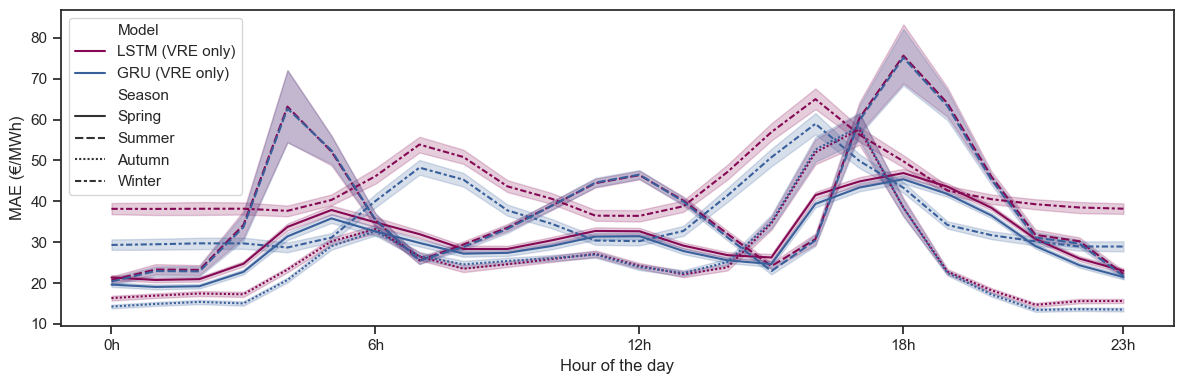

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

season_error_by_hour = hourly_errors.melt(id_vars=['hour', 'Model', 'Season'], value_name='err')

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
}

style_order = ['Spring', 'Summer', 'Autumn', 'Winter']
hue_order = ['LSTM (VRE only)', 'GRU (VRE only)']

sns.set_theme(style="ticks")
plt.figure(figsize=(12, 4))

sns.lineplot(data=season_error_by_hour, x='hour', y='err', hue='Model', hue_order=hue_order, palette=palette, style='Season', style_order=style_order, dashes=True)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('Hour of the day')
plt.xticks([0, 6, 12, 18, 23], ['0h', '6h', '12h', '18h', '23h'])
plt.legend()
plt.tight_layout()

plt.savefig('../reports/figures/mae_by_season_sl.pdf', dpi=300, bbox_inches='tight')
plt.show()

## error by day type

In [62]:
cols = ['lstm_error', 'gru_error']

records = []

for model in cols:
    for h in range(24):
        tmp = get_hour_errors(df, model, h)
        tmp["Model"] = model.split('_')[0].replace('lstm', 'LSTM (VRE only)').replace('gru', 'GRU (VRE only)')
        records.append(tmp)

holiday_errors = pd.concat(records)

holiday_errors.rename(columns={'target_timestamp':'hour'}, inplace=True)
holiday_errors['hour'] = holiday_errors['hour'].dt.hour
de_holidays = holidays.country_holidays('DE', years=[2023,2024])
# set holiday to 1 if it is a holiday else 0
holiday_errors['Holiday'] = holiday_errors.index.to_series().apply(lambda x: "Holiday" if x in de_holidays else "No holiday")

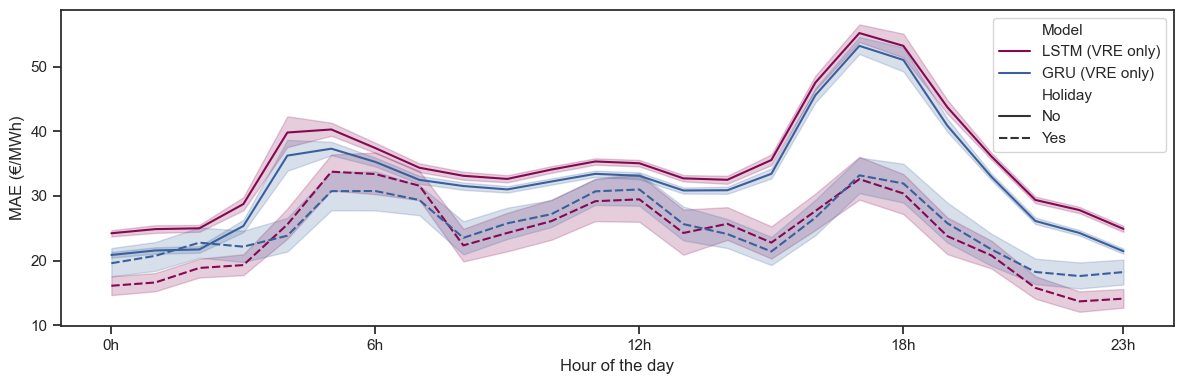

In [64]:
season_error_by_holiday = holiday_errors.melt(id_vars=['hour', 'Model', 'Holiday'], value_name='err')
season_error_by_holiday['Holiday'] = season_error_by_holiday['Holiday'].str.replace('Holiday', 'Yes').str.replace('No holiday', 'No')

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
}

hue_order = ['LSTM (VRE only)', 'GRU (VRE only)']

sns.set_theme(style="ticks")
plt.figure(figsize=(12, 4))

sns.lineplot(data=season_error_by_holiday, x='hour', y='err', hue='Model', hue_order=hue_order, palette=palette, style='Holiday', dashes=True)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('Hour of the day')
plt.xticks([0, 6, 12, 18, 23], ['0h', '6h', '12h', '18h', '23h'])
plt.legend()
plt.tight_layout()

plt.savefig('../reports/figures/mae_by_holiday_sl.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
cols = ['lstm_error', 'gru_error']

records = []

for model in cols:
    for h in range(24):
        tmp = get_hour_errors(df, model, h)
        tmp["Model"] = model.split('_')[0].replace('lstm', 'LSTM (VRE only)').replace('gru', 'GRU (VRE only)')
        records.append(tmp)

day_errors = pd.concat(records)

day_errors['Weekday'] = ['Working Day' if x.weekday() < 5 else 'Weekend' for x in day_errors['target_timestamp']]
day_errors.rename(columns={'target_timestamp':'hour'}, inplace=True)
day_errors['hour'] = day_errors['hour'].dt.hour

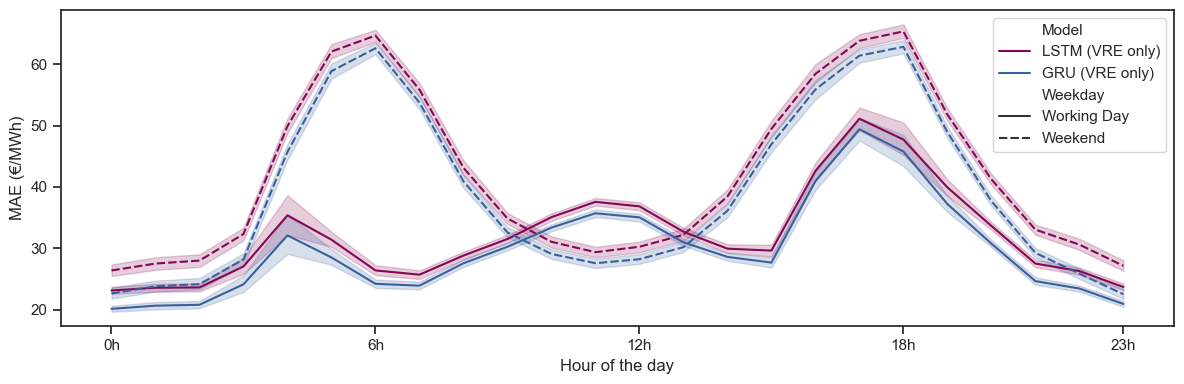

In [67]:
error_by_weekday = day_errors.melt(id_vars=['hour', 'Model', 'Weekday'], value_name='err')

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
}

hue_order = ['LSTM (VRE only)', 'GRU (VRE only)']

sns.set_theme(style="ticks")
plt.figure(figsize=(12, 4))

sns.lineplot(data=error_by_weekday, x='hour', y='err', hue='Model', hue_order=hue_order, palette=palette, style='Weekday', dashes=True)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('Hour of the day')
plt.xticks([0, 6, 12, 18, 23], ['0h', '6h', '12h', '18h', '23h'])
plt.legend()
plt.tight_layout()

plt.savefig('../reports/figures/mae_by_weekday_sl.png', dpi=300, bbox_inches='tight')
plt.show()

# weather based analysis

In [68]:
ghi = pd.read_csv("../data/raw/de_global_horizontal_irradiation_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ws = pd.read_csv("../data/raw/de_wind_speed_100_2024.csv", skiprows=6, parse_dates=True, index_col=1)
ghi_avg = ghi.pivot(columns='location_id', values='shortwave_radiation (W/m²)').mean(axis=1).rename('ghi_avg')
ws_avg = ws.pivot(columns='location_id', values='wind_speed_100m (km/h)').mean(axis=1).rename('ws_avg')

# normalize the data
ghi_avg = (ghi_avg - ghi_avg.min()) / (ghi_avg.max() - ghi_avg.min())
ws_avg = (ws_avg - ws_avg.min()) / (ws_avg.max() - ws_avg.min())

weather_df = ghi_avg + ws_avg
weather_df = (weather_df - weather_df.min()) / (weather_df.max() - weather_df.min())
weather_df = weather_df.to_frame().rename(columns={0: 'Weather index'})
weather_df = (weather_df * 100).round(0)

In [69]:
cols = ['lstm_error', 'gru_error']

records = []

for model in cols:
    for h in range(24):
        tmp = get_hour_errors(df, model, h)
        tmp["Model"] = model.split('_')[0].replace('lstm', 'LSTM (VRE only)').replace('gru', 'GRU (VRE only)')
        records.append(tmp)

weather_errors = pd.concat(records)

weather_errors.rename(columns={'target_timestamp':'hour'}, inplace=True)
weather_errors['hour'] = weather_errors['hour'].dt.hour
weather_errors = weather_errors.join(weather_df, how='inner')

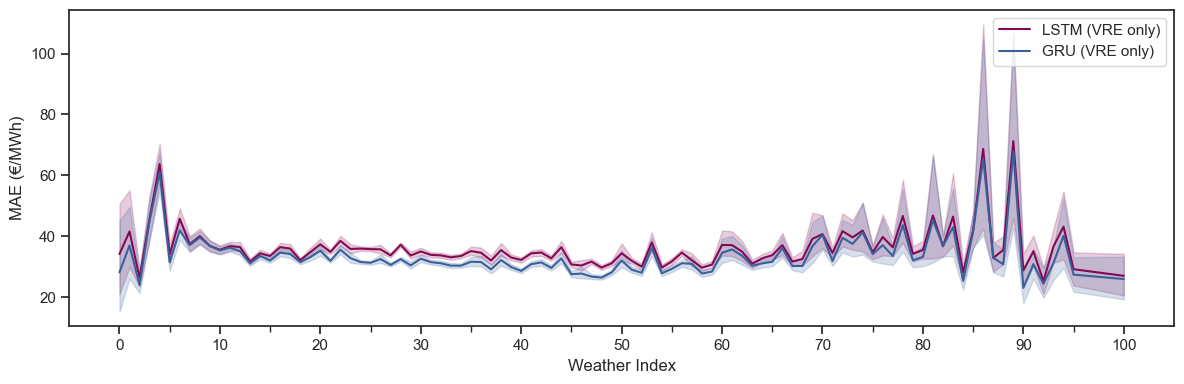

In [71]:
error_by_weather = weather_errors.melt(id_vars=['Weather index', 'Model', 'hour'], value_name='err')

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
}

sns.set_style('ticks')
plt.figure(figsize=(12, 4))

sns.lineplot(data=error_by_weather, x='Weather index', y='err', hue='Model', palette=palette)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('Weather Index')
plt.xticks(np.arange(0, 101, 10), labels=[f'{i}' for i in np.arange(0, 101, 10)])
plt.xticks(np.arange(5, 96, 10), minor=True)
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('../reports/figures/error_distribution_by_weather_measure_sl.png', dpi=300, bbox_inches='tight')

# vre load vs error

In [72]:
vre_load = pd.read_csv("../data/raw/de_vre_gen_2024.csv", parse_dates=True, index_col=0, skiprows=lambda x: x in [1]).round(-3)
vre_load = vre_load[::4].sum(axis=1).rename('VRE load')
vre_load.index = vre_load.index.tz_localize(None)

In [73]:
cols = ['lstm_error', 'gru_error']

records = []

for model in cols:
    for h in range(24):
        tmp = get_hour_errors(df, model, h)
        tmp["Model"] = model.split('_')[0].replace('lstm', 'LSTM (VRE only)').replace('gru', 'GRU (VRE only)')
        records.append(tmp)

vre_errors = pd.concat(records)

vre_errors.rename(columns={'target_timestamp':'hour'}, inplace=True)
vre_errors['hour'] = vre_errors['hour'].dt.hour
vre_errors = vre_errors.join(vre_load, how='inner')

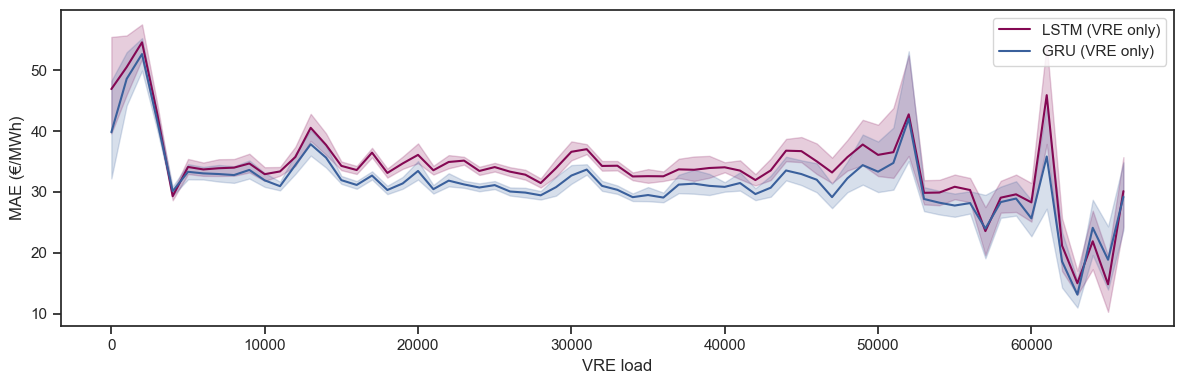

In [75]:
error_by_vre_load = vre_errors.melt(id_vars=['VRE load', 'Model', 'hour'], value_name='err')

palette = {
    'LSTM (VRE only)': COLORS['magenta'],
    'GRU (VRE only)': COLORS['blue'],
}

sns.set_style('ticks')
plt.figure(figsize=(12, 4))

sns.lineplot(data=error_by_vre_load, x='VRE load', y='err', hue='Model', palette=palette)

plt.ylabel('MAE (€/MWh)')
plt.xlabel('VRE load')
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('../reports/figures/error_distribution_by_vre_load.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Diebold Mariano Test

In [60]:
import pickle as pkl
import pandas as pd
import numpy as np
from epf.util import predict_with_timestamps

models = {
    # LSTM
    # single layer
    'shifted_lstm_vre_sl': 'LSTM VRE SL',
    'shifted_lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'shifted_lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'shifted_lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'shifted_lstm_vre_all_features_sl': 'LSTM all features SL',

    # multi layer
    'shifted_lstm_vre': 'LSTM VRE',
    'shifted_lstm_vre_fossil': 'LSTM VRE fossil',
    'shifted_lstm_vre_lags': 'LSTM VRE lags',
    'shifted_lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'shifted_lstm_vre_all_features': 'LSTM all features',

    # GRU
    # single layer
    'shifted_gru_vre_sl': 'GRU VRE SL',
    'shifted_gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'shifted_gru_vre_lags_sl': 'GRU VRE lags SL',
    'shifted_gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'shifted_gru_vre_all_features_sl': 'GRU all features SL',

    # multi layer
    'shifted_gru_vre': 'GRU VRE',
    'shifted_gru_vre_fossil': 'GRU VRE fossil',
    'shifted_gru_vre_lags': 'GRU VRE lags',
    'shifted_gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'shifted_gru_vre_all_features': 'GRU all features',
}

tmp = {'shifted_lstm_vre': 'LSTM VRE',
       'shifted_gru_vre': 'GRU VRE',}

# ----------------------------------------------------------------- #
# dict to hold the model name and the returned predictions
data = {}

# ----------------------------------------------------------------- #
# helper function to get the values at the forecast horizon from the predictions
def get_hour_values(df, block_prefix, target_hour):
    cols = [f"{block_prefix}_t+{i}" for i in range(1, 25)]
    mat = df[cols].values
    origin = df.index.hour
    horizons = ((target_hour - origin - 1) % 24) + 1
    vals = mat[np.arange(len(df)), horizons - 1]
    target_timestamps = df.index + pd.to_timedelta(horizons, unit="h")

    return pd.DataFrame({
        'values': vals,
        "target_timestamp": target_timestamps
    }, index=df.index)

# ----------------------------------------------------------------- #
# Load models and predictions and their true values
for key, name in models.items():
    path = f"../models/{key}.pkl"
    with open(path, "rb") as f:
        model_obj = pkl.load(f)

    preds = predict_with_timestamps(model_obj)
    preds.columns = [f'{name}_{col.split("_")[-1]}' for col in preds.columns]

    records = []
    for h in range(24):
        hour_values = get_hour_values(preds, name, h)
        records.append(hour_values)

    preds = pd.concat(records)
    preds['target_timestamp'] = pd.to_datetime(preds['target_timestamp'])
    preds.index = preds['target_timestamp']
    preds.drop(columns=['target_timestamp'], inplace=True)
    preds = preds.groupby(pd.Grouper(freq='h')).mean()

    data.update({name: preds,})

# ----------------------------------------------------------------- #
# Create naive model and forecasts
raw = pd.read_csv('../data/raw/de_prices_2024.csv', parse_dates=True, skiprows=2, index_col=0, names=['de_prices'], dtype={'de_prices': float})
raw.index = raw.index.tz_localize(None)

# create a naive forecast by forecasting at each hour the price of the same hour from the previous week and flatten the naive predictions into one row of the dataframe making each row of the df a 24 hour forecast
y = raw['de_prices']

horizons = range(1, 25)
col_names = [f't+{h}' for h in horizons]

naive_hourly = pd.DataFrame(index=y.index, columns=col_names)

# fill the naive predictions with the prices of the same hour from the previous week, each forecast is a row in the dataframe
for h in horizons:
    shift_amount = 168 - h  # 168 hours = 1 week
    naive_hourly[f'naive_hourly_t+{h}'] = y.shift(shift_amount)

start = data.get('LSTM VRE').index[0]
end = data.get('LSTM VRE').index[-1]

# remove the timezone awareness from the index
naive_hourly.index = naive_hourly.index.tz_localize(None)

naive_hourly = naive_hourly.loc[start:end]

# reshape data to fit dm specification of (n_days, n_prices_per_day)
naive_records, true_records = [], []
for h in range(24):
    naive_hour_values = get_hour_values(naive_hourly, 'naive_hourly', h)
    naive_records.append(naive_hour_values)

naive_hourly = pd.concat(naive_records)
naive_hourly['target_timestamp'] = pd.to_datetime(naive_hourly['target_timestamp'])
naive_hourly.index = naive_hourly['target_timestamp']
naive_hourly.drop(columns=['target_timestamp'], inplace=True)
naive_hourly = naive_hourly.groupby(pd.Grouper(freq='h')).mean()

# ------------------------------------------------------------------ #
# add naive and true values to the data dict
data.update({'Naïve': naive_hourly,})

# ------------------------------------------------------------------ #
# rename and join all dataframes into one big forecast df
renamed_data = [
    df.rename(columns={'values': name})
    for name, df in data.items()
]

forecasts = pd.concat(renamed_data, axis=1, join='inner')
forecasts.to_csv('../data/processed/forecasts.csv', index=True)

univariate DM test (compare LSTM and GRU VRE only (single- and multi-layer) agianst each other and against naive for each hour of the forecasting horizon)

In [47]:
import pandas as pd

# load forecasts
forecasts = pd.read_csv('../data/processed/forecasts.csv', parse_dates=True).dropna()
df_price = pd.read_csv('../data/raw/de_prices_2024.csv', parse_dates=True, skiprows=2, index_col=0, names=['de_prices'], dtype={'de_prices': float})
df_price.index = df_price.index.tz_localize(None)

forecasts.set_index('target_timestamp', inplace=True)
forecasts.index = pd.to_datetime(forecasts.index)
forecasts.tail()

,LSTM VRE SL,LSTM VRE fossil SL,LSTM VRE lags SL,LSTM VRE neighboring prices SL,LSTM all features SL,LSTM VRE,LSTM VRE fossil,LSTM VRE lags,LSTM VRE neighboring prices,LSTM all features,...,GRU VRE fossil SL,GRU VRE lags SL,GRU VRE neighboring prices SL,GRU all features SL,GRU VRE,GRU VRE fossil,GRU VRE lags,GRU VRE neighboring prices,GRU all features,Naïve
target_timestamp,,,,,,,,,,,,,,,,,,,,,
2024-12-31 19:00:00,-14.210626,45.961046,-20.355447,55.178557,41.017070,23.847800,-18.905374,-25.650533,50.252657,50.486138,...,33.294808,12.184456,49.306096,28.102996,12.204916,38.805788,17.673007,56.469023,56.110579,102.56
2024-12-31 20:00:00,-51.490428,7.845347,-58.327463,17.422701,0.981509,-13.233728,-59.888330,-61.842510,8.483595,11.898615,...,-3.219181,-26.295126,7.534478,-10.980417,-24.685035,1.512736,-18.307037,17.358761,18.827252,94.63
2024-12-31 21:00:00,-60.098858,-1.805457,-67.981316,8.297103,-10.113621,-21.422614,-70.868766,-67.455410,-4.367708,1.563928,...,-11.833360,-37.849519,-3.029972,-21.296609,-33.112190,-8.142778,-26.029784,6.994106,10.123430,99.04
2024-12-31 22:00:00,-87.136843,-30.491017,-95.213418,-19.658177,-41.128629,-47.734101,-99.946523,-94.486765,-34.752133,-28.117207,...,-38.330457,-67.736136,-30.506333,-49.424638,-60.188512,-37.041055,-52.697839,-19.952142,-17.718655,90.00
2024-12-31 23:00:00,-45.013900,10.721154,-54.064620,20.105470,-3.432578,-9.576842,-58.774600,-58.986603,2.012170,7.088311,...,2.248422,-32.687949,15.548791,-9.393256,-22.328055,1.794015,-8.285575,21.231340,22.327066,91.37


In [48]:
from epf.dm import DM

forecast_subset = forecasts[['LSTM VRE SL', 'LSTM VRE', 'GRU VRE SL', 'GRU VRE', 'Naïve']]
p_values_univariate = {}

first_day = forecast_subset.index[0].date()
last_day = forecast_subset.index[-1].date()

forecast_subset = forecast_subset[(forecast_subset.index.date != first_day) & (forecast_subset.index.date != last_day)]

start = forecast_subset.index[0]
end = forecast_subset.index[-1]

df_price = df_price.loc[start:end]

true_prices = df_price.loc[: ,['de_prices']]

for model1 in forecast_subset.columns:
    for model2 in forecast_subset.columns:
        if model1 == model2:
            p_values_univariate.update({model1 + ' & ' + model2: np.ones(24,)})
        else:
            p = DM(p_real=true_prices.values.reshape(-1, 24),
                   p_pred_1=forecast_subset.loc[: ,model1].values.reshape(-1, 24),
                   p_pred_2=forecast_subset.loc[: ,model2].values.reshape(-1, 24),
                   norm=1,
                   version='univariate')
            p_values_univariate.update({model1 + ' & ' + model2: p})

p_values_univariate

{'LSTM VRE SL & LSTM VRE SL': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]),
 'LSTM VRE SL & LSTM VRE': array([6.30424451e-02, 1.26810668e-01, 1.12309818e-01, 2.48413045e-03,
        4.29880206e-08, 2.52718789e-07, 6.64310940e-10, 9.84849282e-05,
        1.32484256e-01, 5.76813859e-01, 9.40279653e-01, 9.80953396e-01,
        9.78654385e-01, 7.35366286e-01, 4.59499640e-02, 6.70794745e-08,
        6.66133815e-16, 3.72146758e-12, 9.12725451e-12, 2.14273044e-14,
        1.66687775e-11, 1.78936893e-08, 1.82616063e-04, 4.12270117e-03]),
 'LSTM VRE SL & GRU VRE SL': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.54332103e-12, 1.22327763e-07, 5.32625326e-06,
        1.25161396e-04, 1.05857748e-04, 2.50687965e-05, 7.29599287e-06,
        2.76835368e-06, 1.22418332e-05, 3.80164964e-05, 6.72498014e-08,
        1.34245678e-05, 1.64187179e-05, 8.08059946e-07, 1.17440502e-11,
        1

multivariate DM test (each model gets compared against all other models, but only for the entire forecasting horizon and not each hour)

In [49]:
from epf.dm import DM

fcast = forecasts.copy()

first_day = fcast.index[0].date()
last_day = fcast.index[-1].date()

fcast = fcast[(fcast.index.date != first_day) & (fcast.index.date != last_day)]

start = fcast.index[0]
end = fcast.index[-1]

df_price = df_price.loc[start:end]

true_prices = df_price.loc[: ,['de_prices']]

p_values = pd.DataFrame(index=fcast.columns, columns=fcast.columns)

for model1 in fcast.columns:
    for model2 in fcast.columns:
        # For the diagonal elemnts representing comparing the same model we directly set a
        # p-value of 1
        if model1 == model2:
            p_values.loc[model1, model2] = 1
        else:
            p_values.loc[model1, model2] = DM(p_real=true_prices.values.reshape(-1, 24),
                                              p_pred_1=fcast.loc[:, model1].values.reshape(-1, 24),
                                              p_pred_2=fcast.loc[:, model2].values.reshape(-1, 24),
                                              norm=1, version='multivariate')

p_values

,LSTM VRE SL,LSTM VRE fossil SL,LSTM VRE lags SL,LSTM VRE neighboring prices SL,LSTM all features SL,LSTM VRE,LSTM VRE fossil,LSTM VRE lags,LSTM VRE neighboring prices,LSTM all features,...,GRU VRE fossil SL,GRU VRE lags SL,GRU VRE neighboring prices SL,GRU all features SL,GRU VRE,GRU VRE fossil,GRU VRE lags,GRU VRE neighboring prices,GRU all features,Naïve
LSTM VRE SL,1,0.0,0.000028,0.0,0.0,0.000002,0.000033,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.541748
LSTM VRE fossil SL,1.0,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.000001,...,0.545264,1.0,0.0,0.000002,0.999981,0.0,1.0,0.0,0.0,0.983287
LSTM VRE lags SL,0.999972,0.0,1,0.0,0.0,0.311172,0.025451,0.020443,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.736244
LSTM VRE neighboring prices SL,1.0,1.0,1.0,1,0.952614,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.898577,1.0,1.0,1.0,1.0,0.922096,1.0,0.999987
LSTM all features SL,1.0,1.0,1.0,0.047386,1,1.0,1.0,1.0,0.996945,0.999865,...,1.0,1.0,0.394295,0.999933,1.0,1.0,1.0,0.458825,0.999969,0.999966
LSTM VRE,0.999998,0.0,0.688828,0.0,0.0,1,0.046572,0.10145,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.752638
LSTM VRE fossil,0.999967,0.0,0.974549,0.0,0.0,0.953428,1,0.75223,0.0,0.0,...,0.0,1.0,0.0,0.0,0.001178,0.0,1.0,0.0,0.0,0.847596
LSTM VRE lags,1.0,0.0,0.979557,0.0,0.0,0.89855,0.24777,1,0.0,0.0,...,0.0,1.0,0.0,0.0,0.000007,0.0,1.0,0.0,0.0,0.798974
LSTM VRE neighboring prices,1.0,1.0,1.0,0.0,0.003055,1.0,1.0,1.0,1,0.96907,...,1.0,1.0,0.002377,0.963015,1.0,0.999987,1.0,0.001233,0.861609,0.99992
LSTM all features,1.0,0.999999,1.0,0.0,0.000135,1.0,1.0,1.0,0.03093,1,...,0.999999,1.0,0.000437,0.672314,1.0,0.997178,1.0,0.000303,0.178451,0.999809


# Plot DM Test

In [50]:
import matplotlib.colors as mcolors


# Diverging cmap, thanks chatgpt
c1 = mcolors.to_rgb(COLORS["magenta"])
c1_stop = mcolors.to_rgb(COLORS["light_purple"])
c2 = mcolors.to_rgb(COLORS["light_blue"])
c2_stop = mcolors.to_rgb(COLORS["blue"])
alpha = 1

# === Parameters
N = 256
threshold1 = int(0.05 * (N - 1))   # 0.05 breakpoint
threshold2 = int(0.10 * (N - 1))   # 0.1 max value

colors = np.zeros((N, 3))

# --- From c1 to c1_stop (0 → 0.05)
for i in range(0, threshold1 + 1):
    t = i / threshold1
    colors[i] = (1 - t) * np.array(c1) + t * np.array(c1_stop)

# --- From c2 to c2_stop (0.05 → 0.1)
for i in range(threshold1 + 1, threshold2 + 1):
    t2 = (i - (threshold1 + 1)) / (threshold2 - threshold1)
    colors[i] = (1 - t2) * np.array(c2) + t2 * np.array(c2_stop)

# --- For values > 0.1, stay at c2_stop
colors[threshold2 + 1 :] = c2_stop

# === Slice to relevant range (0–0.1)
trimmed_colors = colors[:threshold2 + 2]

# Add alpha channel
rgba_colors = np.concatenate([trimmed_colors, np.full((trimmed_colors.shape[0], 1), alpha)], axis=1)

# Use RGBA colormap
trimmed_cmap = mcolors.ListedColormap(rgba_colors)

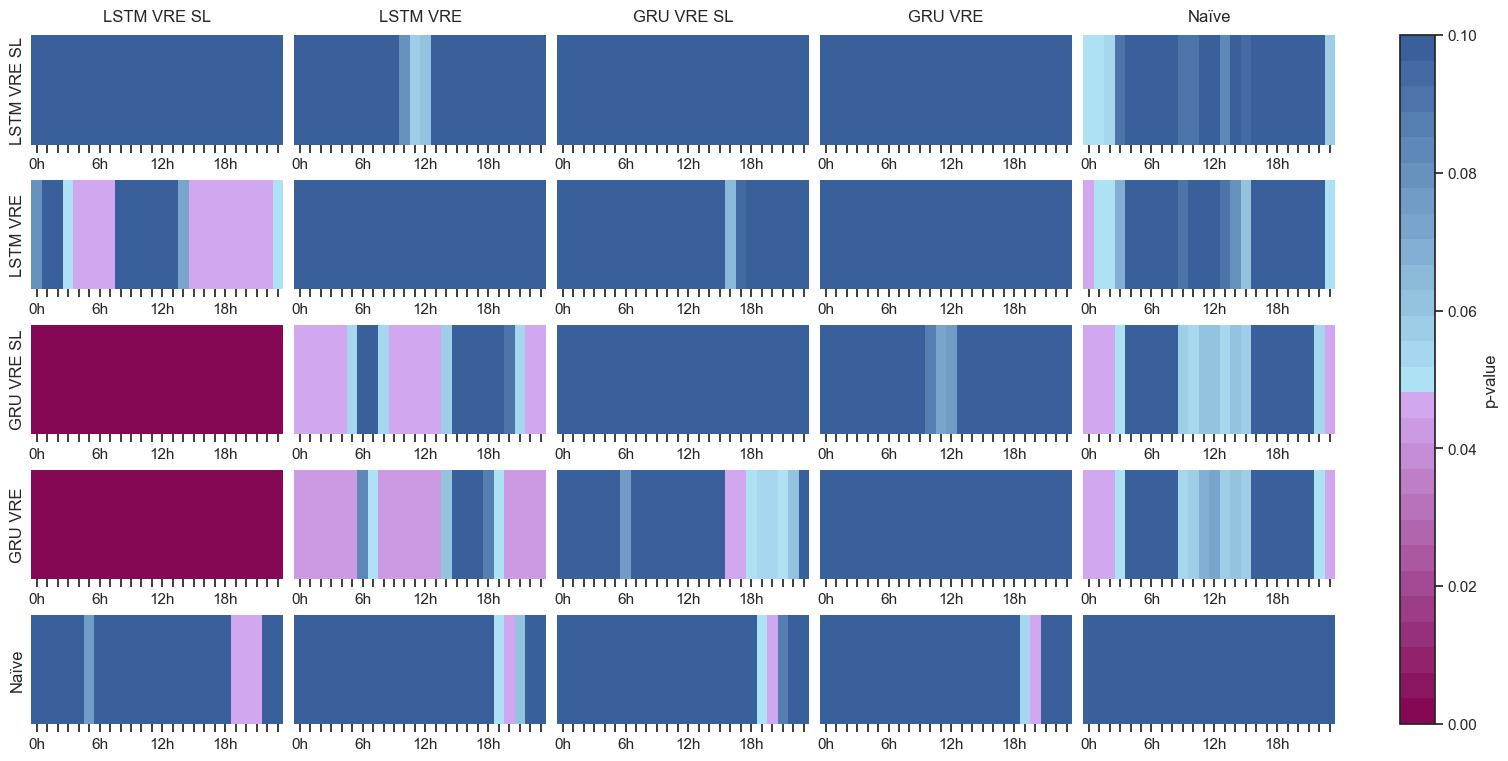

In [51]:
import matplotlib.colors as mcolors

# flatten df
data = []
for model_pair, vals in p_values_univariate.items():
    for hour in range(24):
        data.append({
            "Hour": hour,
            "p-value": vals[hour],
            "Model Comparison": model_pair
        })

df = pd.DataFrame(data)
df[['Model_A', 'Model_B']] = df['Model Comparison'].str.split('&', expand=True)
df['Model_A'] = df['Model_A'].str.strip()
df['Model_B'] = df['Model_B'].str.strip()

# subplot grid
unique_pairs = df['Model Comparison'].unique()

model_a_unique = df['Model_A'].unique()
model_b_unique = df['Model_B'].unique()

fig, axes = plt.subplots(len(model_b_unique), len(model_a_unique), figsize=(len(model_a_unique) * 3, len(model_b_unique) * 1.5), constrained_layout=True)

norm = mcolors.Normalize(vmin=0, vmax=0.1)

for i, model_b in enumerate(model_b_unique):
    for j, model_a in enumerate(model_a_unique):
        ax = axes[i, j] if len(model_b_unique) > 1 and len(model_a_unique) > 1 else (axes[j] if len(model_b_unique) == 1 else axes[i])

        # Mögliche Paar-Namen
        model_pair1 = f"{model_a} & {model_b}"
        model_pair2 = f"{model_b} & {model_a}"

        if model_pair1 in unique_pairs:
            subset = df[df['Model Comparison'] == model_pair1].sort_values('Hour')
        elif model_pair2 in unique_pairs:
            subset = df[df['Model Comparison'] == model_pair2].sort_values('Hour')
        else:
            subset = None

        if subset is not None and not subset.empty:
            vals = subset['p-value'].values.reshape(1, -1)

            sns.heatmap(
                vals,
                ax=ax,
                cmap=trimmed_cmap,
                norm=norm,
                cbar=False,
                xticklabels=[f'{h}h' if h % 6 == 0 else '' for h in range(24)],
                yticklabels=[],
                center=0.05,
                square=False
            )
        else:
            ax.axis('off')

        # Titel in einzelnen Plots entfernen
        ax.set_title('')

        # yticklabels immer aus (da es ja eine gemeinsame linke Beschriftung geben soll)
        ax.set_yticklabels([])

        # y-Achsen-Ticks ausblenden
        ax.tick_params(axis='y', length=0)

# Obere Reihe mit Model_A als Überschrift (Spalten)
for ax, model_a in zip(axes[0], model_a_unique):
    ax.set_title(model_a, fontsize=12, pad=10)

# Linke Spalte mit Model_B als y-Achsen-Beschriftung (einfach mittig links)
for ax, model_b in zip(axes[:, 0], model_b_unique):
    ax.set_ylabel(model_b, rotation=90, fontsize=12, labelpad=10, va='center')

# Farblegende
fig.colorbar(
    plt.cm.ScalarMappable(cmap=trimmed_cmap, norm=norm),
    ax=axes.ravel().tolist(),
    orientation='vertical',
    label='p-value'
)
plt.savefig('../reports/figures/dm_test_univariate.png', bbox_inches='tight')

plt.show()

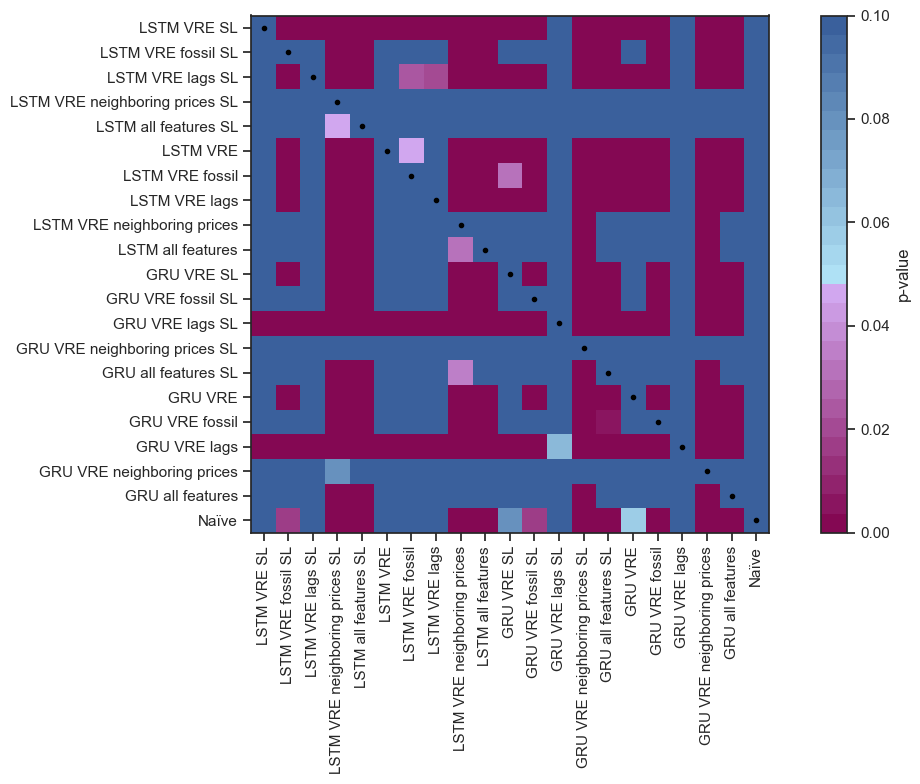

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set_theme(style='ticks')

norm = mcolors.Normalize(vmin=0, vmax=0.1)

plt.figure(figsize=(12, 8))

plt.imshow(p_values.astype(float).values, cmap=trimmed_cmap, norm=norm)
plt.xticks(range(len(fcast.columns)), fcast.columns, rotation=90.)
plt.yticks(range(len(fcast.columns)), fcast.columns)
plt.plot(range(p_values.shape[0]), range(p_values.shape[0]), '.', color='black')

plt.colorbar(label='p-value')
plt.tight_layout()

plt.savefig('../reports/figures/dm_test_multivariate.png', bbox_inches='tight')

### timings

In [556]:
import pickle as pkl
import json

models = {
    # VRE
    'shifted_lstm_vre_sl': 'LSTM VRE SL',
    'shifted_lstm_vre': 'LSTM VRE',
    'shifted_gru_vre_sl': 'GRU VRE SL',
    'shifted_gru_vre': 'GRU VRE',

    # explanatory variables sl
    'shifted_lstm_vre_fossil_sl': 'LSTM VRE fossil SL',
    'shifted_lstm_vre_lags_sl': 'LSTM VRE lags SL',
    'shifted_lstm_vre_neighboring_prices_sl': 'LSTM VRE neighboring prices SL',
    'shifted_lstm_vre_all_features_sl': 'LSTM all features SL',

    'shifted_gru_vre_fossil_sl': 'GRU VRE fossil SL',
    'shifted_gru_vre_lags_sl': 'GRU VRE lags SL',
    'shifted_gru_vre_neighboring_prices_sl': 'GRU VRE neighboring prices SL',
    'shifted_gru_vre_all_features_sl': 'GRU all features SL',

    # explanatory variables ml
    'shifted_lstm_vre_fossil': 'LSTM VRE fossil',
    'shifted_lstm_vre_lags': 'LSTM VRE lags',
    'shifted_lstm_vre_neighboring_prices': 'LSTM VRE neighboring prices',
    'shifted_lstm_vre_all_features': 'LSTM all features',

    'shifted_gru_vre_fossil': 'GRU VRE fossil',
    'shifted_gru_vre_lags': 'GRU VRE lags',
    'shifted_gru_vre_neighboring_prices': 'GRU VRE neighboring prices',
    'shifted_gru_vre_all_features': 'GRU all features',
}

for model_key, model_name in models.items():
    path = f"../models/{model_key}.pkl"
    with open(path, "rb") as f:
        models.update({model_key: pkl.load(f)})

timings = {}

for model_key, model_obj in models.items():
    timings.update({model_obj['model_name']: model_obj['timings']})

with open('../models/timings.json', 'w') as f:
    json.dump(timings, f)

In [ ]:
import pandas as pd

def parse_time_to_seconds(time_str):
    h_str, m_str, s_str = time_str.split(':')
    h = int(h_str.rstrip('h'))
    m = int(m_str.rstrip('m'))
    s = int(s_str.rstrip('s'))
    return h * 3600 + m * 60 + s

def format_mmss(total_seconds):
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes:02d}m:{seconds:02d}s"

res = []
for model_name, times in timings.items():
    feat_sec = parse_time_to_seconds(times["feature_generation"])
    hp_sec = parse_time_to_seconds(times["hp_tuning"])
    train_sec = parse_time_to_seconds(times["training"])

    data_proc = feat_sec
    tuning = hp_sec - feat_sec
    training = train_sec - hp_sec
    total = train_sec

    res.append({
        "Model": model_name,
        "Data Processing": format_mmss(data_proc),
        "Tuning": format_mmss(tuning),
        "Training": format_mmss(training),
        'Total': format_mmss(total)
    })

df_timings = pd.DataFrame(res).set_index("Model")
df_timings

# MAE and RMSE on hourly corrected data

In [10]:
import pandas as pd

# load forecasts
forecasts = pd.read_csv('../data/processed/forecasts.csv', parse_dates=True).dropna()
df_price = pd.read_csv('../data/raw/de_prices_2024.csv', parse_dates=True, skiprows=2, index_col=0, names=['de_prices'],
                       dtype={'de_prices': float})
df_price.index = df_price.index.tz_localize(None)

forecasts.set_index('target_timestamp', inplace=True)
forecasts.index = pd.to_datetime(forecasts.index)

start = forecasts.index[0]
end = forecasts.index[-1]

df_price = df_price.loc[start:end]

true_prices = df_price.loc[:, ['de_prices']]

In [13]:
mae = pd.DataFrame()

for col in forecasts.columns:
    mae[col + '_mae'] = [(forecasts[col] - true_prices['de_prices']).abs().mean()]

In [18]:
mae.T.round(2)

,0
LSTM VRE SL_mae,34.41
LSTM VRE fossil SL_mae,30.66
LSTM VRE lags SL_mae,33.43
LSTM VRE neighboring prices SL_mae,26.88
LSTM all features SL_mae,27.12
LSTM VRE_mae,33.29
LSTM VRE fossil_mae,32.70
LSTM VRE lags_mae,33.05
LSTM VRE neighboring prices_mae,27.67
LSTM all features_mae,28.00


In [16]:
rmse = pd.DataFrame()

for col in forecasts.columns:
    rmse[col + '_rmse'] = [((forecasts[col] - true_prices['de_prices']) ** 2).mean() ** 0.5]

In [19]:
rmse.T.round(2)

,0
LSTM VRE SL_rmse,56.44
LSTM VRE fossil SL_rmse,54.03
LSTM VRE lags SL_rmse,55.90
LSTM VRE neighboring prices SL_rmse,52.19
LSTM all features SL_rmse,52.07
LSTM VRE_rmse,56.30
LSTM VRE fossil_rmse,56.09
LSTM VRE lags_rmse,55.54
LSTM VRE neighboring prices_rmse,53.20
LSTM all features_rmse,53.79
